# Тема “Визуализация данных в Matplotlib”
### *Задание 4

В этом задании мы будем работать с датасетом, в котором приведены данные по мошенничеству с 
кредитными данными: Credit Card Fraud Detection (информация об авторах: Andrea Dal Pozzolo, Olivier 
Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced 
Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015). 

Ознакомьтесь с описанием и скачайте датасет creditcard.csv с сайта Kaggle.com по ссылке: 

https://www.kaggle.com/mlg-ulb/creditcardfraud 

Данный датасет является примером несбалансированных данных, так как мошеннические операции с 
картами встречаются реже обычных. 

Импортруйте библиотеку Pandas, а также используйте для графиков стиль “fivethirtyeight”. 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Посчитайте с помощью метода value_counts количество наблюдений для каждого значения целевой 
переменной  Class  и  примените  к  полученным  данным  метод  plot,  чтобы  построить  столбчатую 
диаграмму. Затем постройте такую же диаграмму, используя логарифмический масштаб. 

In [3]:
DATASET_PATH = 'creditcard.csv'

In [4]:
df = pd.read_csv(DATASET_PATH)
#df.head()

In [5]:
df.shape

(284807, 31)

In [6]:
val_cnt=df['Class'].value_counts()
val_cnt

0    284315
1       492
Name: Class, dtype: int64

In [7]:
df_class = pd.Series(val_cnt)

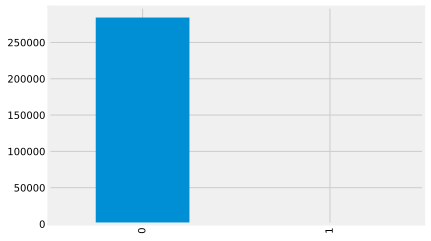

In [8]:
df_class.plot(kind='bar')
plt.show()

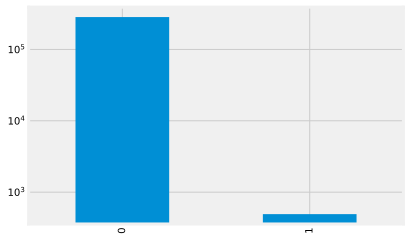

In [9]:
df_class.plot(kind='bar', logy=True)
plt.show()

На  следующем  графике  постройте  две  гистограммы  по  значениям  признака  V1  -  одну  для 
мошеннических  транзакций  (Class  равен  1)  и  другую  -  для  обычных  (Class  равен  0).  Подберите 
значение  аргумента  density  так,  чтобы  по  вертикали  графика  было  расположено  не  число 
наблюдений, а плотность распределения. Число бинов должно равняться 20 для обеих гистограмм, а 
коэффициент  alpha  сделайте  равным  0.5,  чтобы  гистограммы  были  полупрозрачными  и  не 
загораживали друг друга. Создайте легенду с двумя значениями: “Class 0” и “Class 1”. Гистограмма 
обычных  транзакций  должна  быть  серого  цвета,  а мошеннических - красного. Горизонтальной оси 
дайте название “Class”.

In [10]:
v1_class0=df.set_index('Class')['V1'].filter(like='0', axis=0)
v1_class0=v1_class0.reset_index()
v1_class0=v1_class0.drop('Class', axis=1)
#v1_class0.head()
v1_class0.count()

V1    284315
dtype: int64

In [11]:
v1_class1=df.set_index('Class')['V1'].filter(like='1', axis=0)
v1_class1=v1_class1.reset_index()
v1_class1=v1_class1.drop('Class', axis=1)
#v1_class1.head()
v1_class1.count()

V1    492
dtype: int64

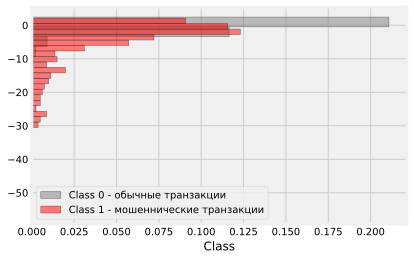

In [12]:
plt.hist(v1_class0['V1'], bins=20, color='gray', edgecolor='black', density = True, orientation = 'horizontal',alpha=0.5)
plt.hist(v1_class1['V1'], bins=20, color='red', edgecolor='black', density = True, orientation = 'horizontal',alpha=0.5)
plt.plot()
plt.xlabel('Class')
plt.legend(labels=['Class 0 - обычные транзакции', 'Class 1 - мошеннические транзакции'])
plt.show()